# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('https://raw.githubusercontent.com/linama2593/realestate-datacleanup-exercise/main/assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
ds['address'].describe()
y=ds[['address','price']][ds['price']==ds['price'].max()].reset_index(drop=True)
print('House with address '+str(y.loc[0,'address'])+ ' is the most expensive priced at '+str(y.loc[0,'price'])+ ' EUR')

House with address El Escorial is the most expensive priced at 8500000 EUR


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
lowest=ds[ds['price']>0]['price'].min()
y=ds[['address','price']][ds['price']==lowest].reset_index(drop=True)
print(y)
print('House with address '+str(y.loc[0,'address'])+ ' is the cheapest priced at '+str(y.loc[0,'price'])+ ' EUR')

#600 EUR seems a quite low for a house in madrid, here is the second cheapest home:
y=ds[['address','price']][ds['price']==ds[ds['price']>600]['price'].min()].reset_index(drop=True)
print(y)
print('Two Houses with address '+str(y.loc[0,'address'])+ ' are the cheapest priced at '+str(y.loc[0,'price'])+ ' EUR')


           address  price
0  Berlin, Coslada    600
House with address Berlin, Coslada is the cheapest priced at 600 EUR
                          address  price
0  Mayor, Los Santos de la Humosa  16200
1  Mayor, Los Santos de la Humosa  16200
Two Houses with address Mayor, Los Santos de la Humosa are the cheapest priced at 16200 EUR


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [4]:
y=ds[['address','surface']][ds['surface']==ds['surface'].max()].reset_index(drop=True)
print(y)
print('The biggest house is located on '+str(y.loc[0,'address'])+ ' and its surface is '+str(y.loc[0,'surface'])+ ' squared meters')

y=ds[['address','surface']][ds['surface']==ds['surface'].min()].reset_index(drop=True)
print(y)
print('The smallest house is located on '+str(y.loc[0,'address'])+ ' and its surface is '+str(y.loc[0,'surface'])+ ' squared meters')


            address   surface
0  Sevilla la Nueva  249000.0
The biggest house is located on Sevilla la Nueva and its surface is 249000.0 squared meters
                         address  surface
0  Calle Amparo,  Madrid Capital     15.0
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 squared meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [5]:
print(ds['level5'].value_counts())
pop=ds[['level5']].drop_duplicates().reset_index(drop=True)+', '
print('The data contain 168 unique populations: '+pop.to_string(index=False))



level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64
The data contain 168 unique populations:                            level5
                Arganda del Rey, 
                    Fuenlabrada, 
             Boadilla del Monte, 
            Las Rozas de Madrid, 
                 Madrid Capital, 
           Villaviciosa de Odón, 
                          Pinto, 
                      Valdemoro, 
                   Navalcarnero, 
             Pozuelo de Alarcón, 
              Torrejón de Ardoz, 
                  Navalagamella, 
     San Sebastián de los Reyes, 
              Rivas-vaciamadrid, 
                      Alpedrete, 
                       Móstoles, 
        San Fern

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [6]:
print('boolean to chech if there is at least ONE missing observation on each variable:'+ '\n' + str(ds.isna().any()))



boolean to chech if there is at least ONE missing observation on each variable:
Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode   

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [7]:
#print('Count of missing data for each variable sorted: '+ str(ds.isna().sum().sort_values(ascending=False)))

print('The original data frame contains: '+str(len(ds))+ ' observations')
#deleting missing data:
drop_ds=ds.dropna()
print('\n'+'The result of dropping missing data is an empty DataFrame: '+str(len(drop_ds))+ ' observations')

#If I delete the 2 columns with the highest count of missings: zipCode and level6
drop2_ds=ds.drop(columns=['level6', 'zipCode']).dropna()
print('\n'+'The result of dropping missing data, ignoring the 2 variables with the highest count of missings, is **STILL** an empty DataFrame: '+str(len(drop2_ds))+ ' observations')

#If I delete the 3 columns with the highest count of missings: zipCode, level6, and custom zone
drop2_ds=ds.drop(columns=['level6', 'zipCode','customZone']).dropna()
print('\n'+'The result of dropping missing data, ignoring the 3 variables with the highest count of missings, is a DataFrame with: ',str(len(drop2_ds))+' observations')

#If I delete the 7 columns with the highest count of missings: zipCode, level6, and custom zone
drop3_ds=ds.drop(columns=['level6','zipCode', 'customZone', 'level6', 'level8', 'level4', 'level7']).dropna()
print('\n'+'The result of dropping missing data, ignoring the 7 variables with the highest count of missings, is a DataFrame with: ',str(len(drop3_ds))+' observations')

print('\n'+'Note: Data framge drop3_ds is the one that preserves most of the observations from the original data.'
        '\n'+'The goal to of preserving most of the data is to reduce the chances of drawing biased conclusions about the real state market in Madrid')

The original data frame contains: 15335 observations

The result of dropping missing data is an empty DataFrame: 0 observations

The result of dropping missing data, ignoring the 2 variables with the highest count of missings, is **STILL** an empty DataFrame: 0 observations

The result of dropping missing data, ignoring the 3 variables with the highest count of missings, is a DataFrame with:  110 observations

The result of dropping missing data, ignoring the 7 variables with the highest count of missings, is a DataFrame with:  12831 observations

Note: Data framge drop3_ds is the one that preserves most of the observations from the original data.
The goal to of preserving most of the data is to reduce the chances of drawing biased conclusions about the real state market in Madrid


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [8]:
print('The average home price in Arroyomolinos is: '+str(int(drop3_ds[drop3_ds['level5']=='Arroyomolinos (Madrid)']['price'].mean()))+' EUR')


The average home price in Arroyomolinos is: 298780 EUR


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

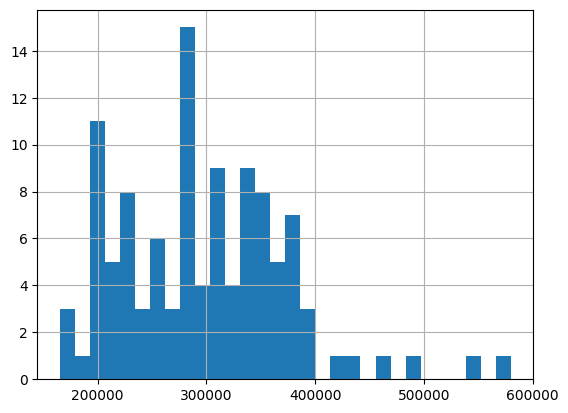

In [9]:
drop3_ds[drop3_ds['level5']=='Arroyomolinos (Madrid)']['price'].hist(bins=30)
plt.show()


Home prices in Arroyomolinos mostly range between 150,000 EUR and 400,000 EUR. There seems to be quite a few outliers of homes priced above 400k EUR

#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [10]:
print('The average house price in Valdemorillo is: '+ str(int(drop3_ds[drop3_ds['level5']=='Valdemorillo']['price'].mean()))+' EUR'+
'\n'+'Whereas the average house price in Galapagar is: '+ str(int(drop3_ds[drop3_ds['level5']=='Galapagar']['price'].mean()))
+'\n'+'Home prices are not exactly the same but they are close')



The average house price in Valdemorillo is: 384269 EUR
Whereas the average house price in Galapagar is: 381106
Home prices are not exactly the same but they are close


#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [11]:
drop3_ds['pps']=drop3_ds['price']/drop3_ds['surface']

print('The average price per square in Valdemorillo is: '+ str(int(drop3_ds[drop3_ds['level5']=='Valdemorillo']['pps'].mean()))+' EUR'+
'\n'+'Whereas the average house price per square in Galapagar is: '+ str(int(drop3_ds[drop3_ds['level5']=='Galapagar']['pps'].mean())) +' EUR'
+'\n'+'Home prices are not exactly the same but they are close')

The average price per square in Valdemorillo is: 1321 EUR
Whereas the average house price per square in Galapagar is: 1566 EUR
Home prices are not exactly the same but they are close


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

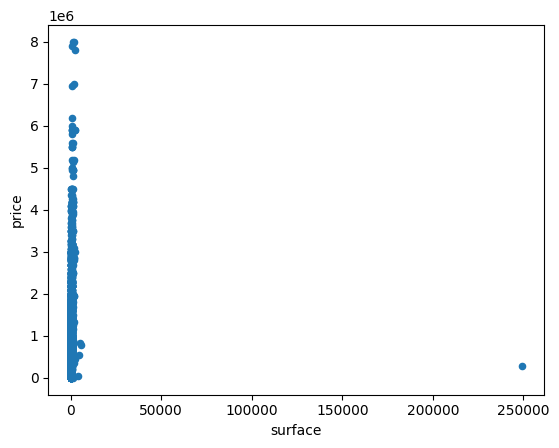

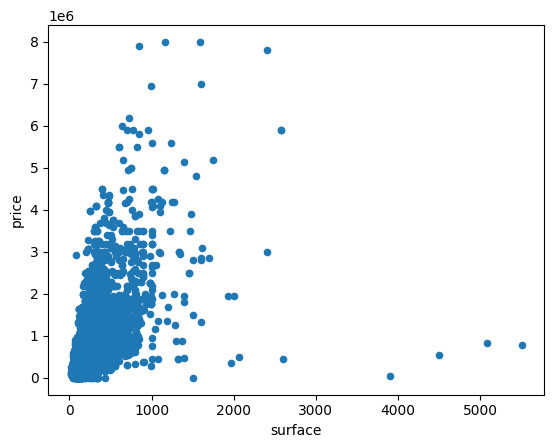

In [12]:
drop3_ds.plot(kind='scatter', x='surface', y='price')
plt.show()
drop3_ds[drop3_ds['surface']<200000].plot(kind='scatter',  y='price', x='surface')
plt.show()

It's not easy to assess the relationship between these two variables as the first grapth shows there is an outlier data point close to 250000

The second graph removes the outlier and it suggests a positive association between price and surface (i.e., a higher-surface home is correlated with a higher price)



#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [13]:
print('The data contain '+ str(len(drop3_ds[['realEstate_name']].drop_duplicates()))
+' real state agencies')

The data contain 1444 real state agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [14]:
print('The population with the most house listings is'+
 str(drop3_ds[['level5']].value_counts(ascending=False).idxmax())
 +' with '+str(drop3_ds[['level5']].value_counts(ascending=False).max()) +' listings')

The population with the most house listings is(' Madrid Capital',) with 5658 listings


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [15]:
south_belt=drop3_ds[drop3_ds['level5'].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

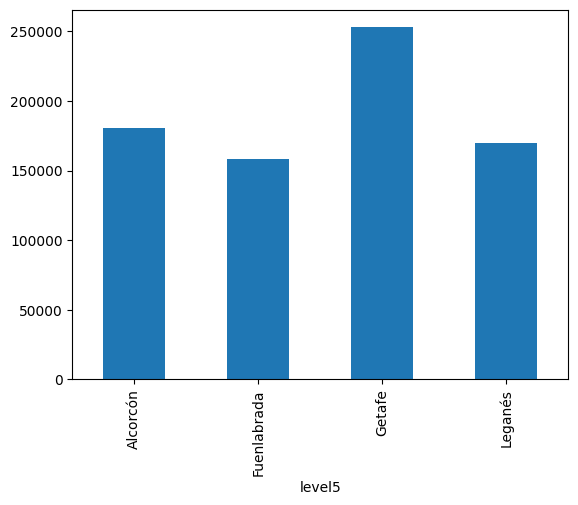

In [16]:
south_belt.groupby('level5')['price'].median().plot(kind='bar')
plt.show()


In the south belth of Madrid, the area with the highest median home price is Getafe (~250K EUR), followed by Alcorcon the median home costs approximately 175,000 EUR

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [17]:
print(south_belt[['price','rooms','surface','bathrooms']].agg(['mean','var']))



             price     rooms      surface  bathrooms
mean  2.205906e+05  3.001372   110.102881   1.615912
var   1.529399e+10  0.710163  4212.971544   0.555571


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [18]:
for x in ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]:
    condition=(south_belt['price']==south_belt[south_belt['level5']==x]['price'].max())

    print(south_belt[['level5','address','price']][condition])
    print('\n')



            level5                                address   price
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada  490000


        level5                       address   price
10412  Leganés  Avenida Reina Sofía, Leganés  650000


      level5 address    price
2881  Getafe  Getafe  1050000


        level5   address   price
5585  Alcorcón  Alcorcón  950000




#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

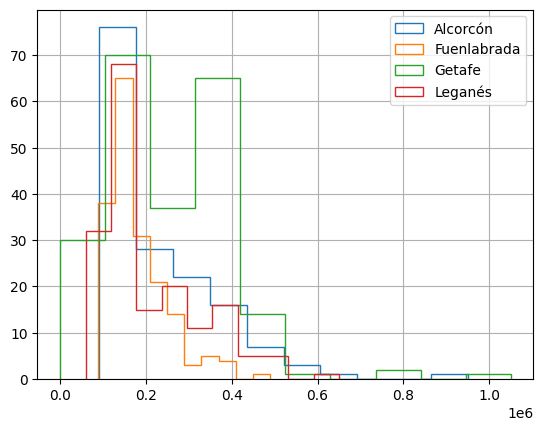

In [19]:
norm = lambda x: (x - x.mean()) / x.std()
south_belt.insert(len(south_belt.columns), 'norm_price', south_belt.groupby(['level5'])['price'].transform(norm)) #adds a new column to the dataframe with new prices

south_belt.groupby('level5')['price'].hist(histtype='step', stacked=True, fill=False, legend=True)
plt.show()


In all 4 populations, most house prices range between 100,000 EUR and 500,000 EUR

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

                 mean         std          min          max
level5                                                     
Alcorcón  2244.568484  536.998172  1158.227848  3698.159509
Getafe    2088.189911  753.993443     0.000000  3827.160494
Alcorcon has an average higher price per square meter than Getafe. Prices per square meter in Alcorcon 
range approximately from 1,100 to 3,600 EUR, whereas in Getafe prices range from 0 to 3800 EUR,
 suggesting that there may be some missing information for house prices in Getafe reported as 0

                 mean  std          min          max
level5                                              
Alcorcón  1315.789474  NaN  1315.789474  1315.789474
After recalculating, removing prices ==0, the average price per square meter in Getafe 
is still lower than that of Alcorcon, although now prices in Getafe range from roughly 1,00 
to 3800 EUR per square meter


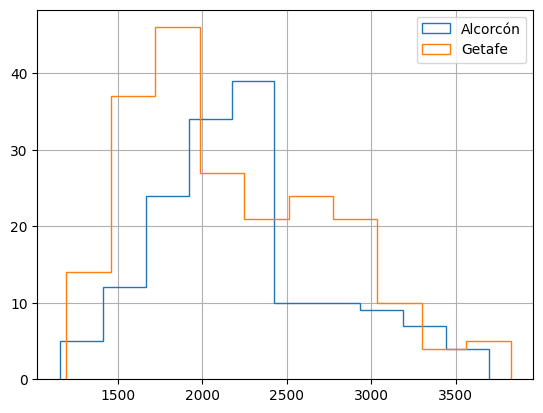

In [20]:
#NOTE: The pps was already calculated on excercise # 10
print(south_belt[south_belt['level5'].isin(['Getafe','Alcorcón'])].groupby('level5')['pps'].agg(['mean', 'std', 'min', 'max']))
print('Alcorcon has an average higher price per square meter than Getafe. Prices per square meter in Alcorcon ' +'\n'+
'range approximately from 1,100 to 3,600 EUR, whereas in Getafe prices range from 0 to 3800 EUR,' +'\n'+
' suggesting that there may be some missing information for house prices in Getafe reported as 0'+'\n')

condit=(south_belt['level5'].isin(['Getafe','Alcorcón'])& south_belt['pps']>0)
print(south_belt[condition].groupby('level5')['pps'].agg(['mean', 'std', 'min', 'max']))
print('After recalculating, removing prices ==0, the average price per square meter in Getafe '+'\n'+
'is still lower than that of Alcorcon, although now prices in Getafe range from roughly 1,00 '+'\n'+
'to 3800 EUR per square meter')

south_belt[condit].groupby('level5')['pps'].hist(histtype='step', stacked=True, fill=False, legend=True)
plt.show()

According to the histogram, and excluding prices==0, Getafe seems to have a greater number of listings both at the lower end and the higher end of the price per squared meters distribution

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆)
Hint: make a scatter plot of each population using subplots.

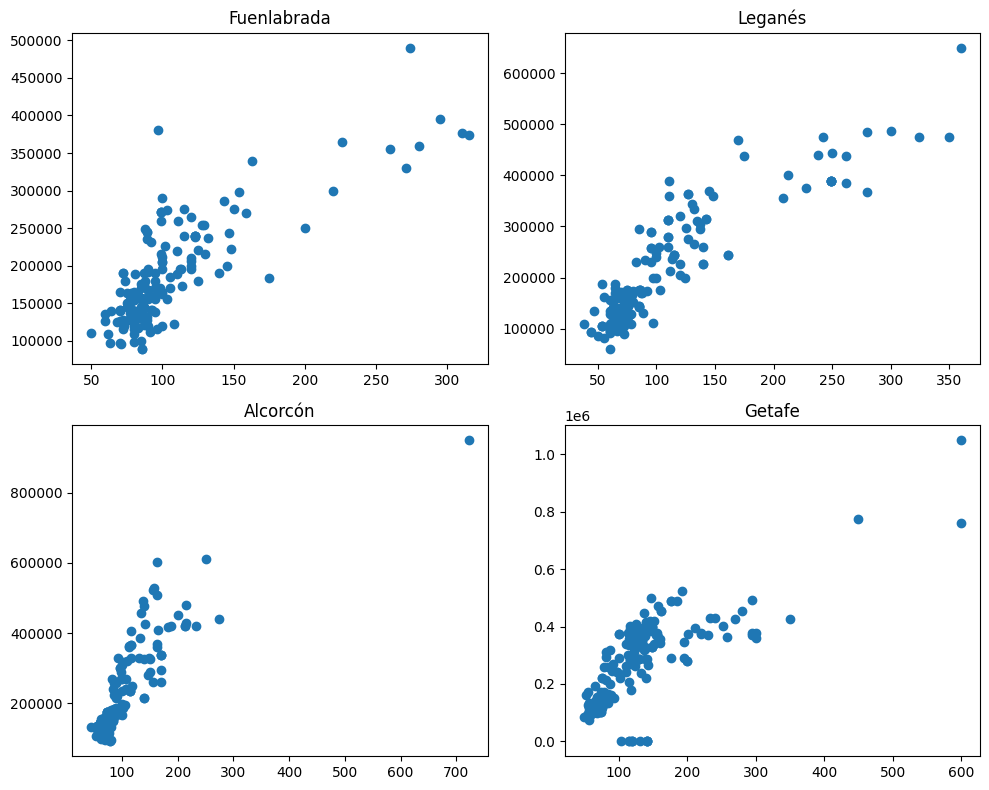

In [21]:
population_names = south_belt['level5'].unique() #storing unique values of level 5

fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # 2x2 grid of subplots

# Loop through the unique population names and create subplots
for i, location in enumerate(population_names):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    data = south_belt[south_belt['level5'] == location]
    ax.plot(data['surface'], data['price'], 'o')
    ax.set_title(location)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [22]:
from ipyleaflet import Map, basemaps, Marker, CircleMarker
from IPython.display import display

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (40.4168, -3.7038), zoom = 10, min_zoom = 1, max_zoom = 20,
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [23]:
print(south_belt[['latitude', 'longitude']].dtypes)

#NOTE:The coordinates are set up as strings since it uses ',' as decimal indicator.
#In python decimals should use '.' as separator
south_belt2 = south_belt.copy()
south_belt2['latitude'] = south_belt2['latitude'].str.replace(',','.').astype('float64')
south_belt2['longitude'] = south_belt2['longitude'].str.replace(',','.').astype('float64')

#df = ds[['latitude', 'longitude','level5']]

# Define a dictionary to map population names to marker colors
population_colours = {
    "Fuenlabrada": "red",
    "Leganés": "blue",
    "Getafe": "green",
    "Alcorcón": "purple"
}

# Iterate through the DataFrame and add markers to the map
for _, row in south_belt2[['latitude','longitude','level5']].iterrows():
  latitude = row['latitude']
  longitude = row['longitude']
  population = row['level5']
  color = population_colours.get(population, "gray")  # Default to gray if population not found

  marker = CircleMarker(location=(latitude, longitude), radius=5, color=color, fill=True, fill_color=color)
  map.add_layer(marker)

# Display the map
display(map)

latitude     object
longitude    object
dtype: object


Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…